# APS 1 - Transferência de Calor e Mecânica dos Sólidos

## Questão 1:

Desenvolva um programa em Python que receba as informações necessárias para determinar cada um dos itens a seguir:

- Ajuste o modelo e defina as condições de contorno para obter um gráfico da distribuição de temperatura (temperatura analítica) ao longo do comprimento da aleta. Qual a temperatura na extremidade da aleta?

In [2]:
# Importando Bibliotecas
from math import pi, sinh, cosh, sqrt
import matplotlib.pyplot as plt
import numpy as np

# Declarando variáveis
Tb = 100 + 273            # Temperatura da Base [K]
Ta = 25 + 273             # Temperatura ambiente [K]
r = 12e-3                 # Raio da Aleta [m]
L = 168e-3                # Comprimento da Aleta [m]
k = 154.808               # Condutividade térmica do alumínio-2014 [W/mK]
h = 15                    # Coeficiente de transferência de calor por convecção natural em [W/(m^2*K)]


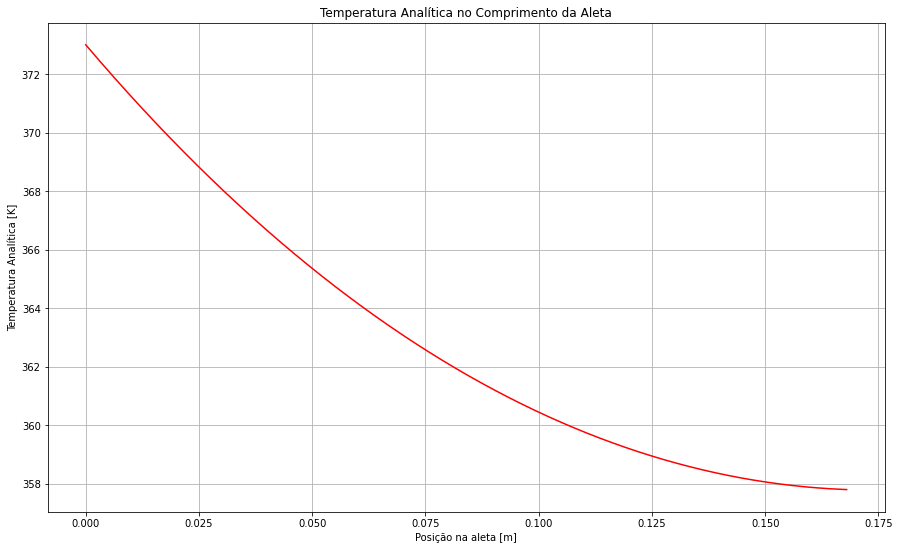

In [3]:
lista_temp_analitica = []

P = 2 * pi * r
Ab = pi * r**2

m = sqrt((h * P) / (k * Ab))

for x in np.arange(0, L, 1e-5):
    num = cosh(m * (L - x)) + (h / (m * k)) * sinh(m * (L - x))
    den = cosh(m * L) + (h / (m * k)) * sinh(m * L)
    dis_temp = num / den
    teta_L = dis_temp * (Tb - Ta)
    Tl = teta_L + Ta
    lista_temp_analitica.append(Tl)

plt.figure(figsize=(15, 9))
plt.plot(np.arange(0, L, 1e-5), lista_temp_analitica, 'r')
plt.title("Temperatura Analítica no Comprimento da Aleta")
plt.xlabel("Posição na aleta [m]")
plt.ylabel("Temperatura Analítica [K]")
plt.grid()
plt.show()


In [4]:
# Temperatura na extremidade da aleta:
print('A temperatura da extremidade da aleta é: {:.3f} °C'.format(lista_temp_analitica[len(lista_temp_analitica) - 1] - 273))

A temperatura da extremidade da aleta é: 84.798 °C


- Determine a taxa de transferência de calor, a eficiência e a efetividade para a geometria da aleta usada.

In [5]:
# Taxa de tranferência de calor:
M = sqrt(h * P * k * Ab) * (Tb - Ta)
qa = M * ((sinh(m * L) + (h / (m * k)) * cosh(m * L)) / (cosh(m * L) + (h / (m * k)) * sinh(m * L)))

print('A taxa de tranferência de calor é: {:.3f} W'.format(qa))

A taxa de tranferência de calor é: 12.747 W


In [6]:
# Efetividade da aleta:
efetividade = qa / (h * Ab * (Tb - Ta))
print('A efetividade da aleta é: {:.3f}'.format(efetividade))

A efetividade da aleta é: 25.045


In [7]:
# Eficiência da aleta:
As = Ab + (2 * pi * r * L)
na = qa / (h * As * (Tb - Ta))
print('A eficiência da aleta é: {:.3f} %'.format(na * 100))

A eficiência da aleta é: 86.364 %


- Assumindo a hipótese de aleta infinita, determine a taxa de transferência de calor. Compare esse valor com o resultado obtido no item anterior. Qual deveria ser o comprimento da aleta para que a hipótese de aleta infinita forneça uma medida precisa para a perda de calor.

In [8]:
# Taxa de tranferência de calor da aleta infinita
print('A taxa de tranferência de calor da aleta infinita é: {:.3f} W'.format(M))

A taxa de tranferência de calor da aleta infinita é: 21.108 W


In [9]:
# Qual deveria ser o comprimento da aleta?
qa_aleta_infinita = M
qa_L = qa
comprimento = L
while qa_aleta_infinita - qa_L > 0.01:
    qa_L = M * ((sinh(m * comprimento) + (h / (m * k)) * cosh(m * comprimento)) / (cosh(m * comprimento) + (h / (m * k)) * sinh(m * comprimento)))
    comprimento += 1e-5

print('O comprimento da aleta para que a hipótese da aleta infinita forneça uma medida precisa de perda de calor é: {:.3f} cm'.format(comprimento*100))


O comprimento da aleta para que a hipótese da aleta infinita forneça uma medida precisa de perda de calor é: 103.265 cm


## Questão 2

$$Dado\: que \; \; M=\theta _{b} \cdot \sqrt{h\cdot P\cdot k\cdot A_{tr}}$$

Um longo bastão circular de alumínio tem uma de suas extremidades fixada a uma parede aquecida e transfere calor por convecção para um fluido frio.

- Se o diâmetro do bastão fosse triplicado, qual seria a mudança na taxa de remoção de calor através do bastão?

Primeiramente, vamos cálcular a taxa de remoção de calor através de um bastão de raio `r`

$$M=\theta _{b} \cdot \sqrt{h\cdot (2\cdot \pi \cdot r)\cdot k\cdot (\pi \cdot r^{2})}$$

$$M=\theta _{b} \cdot \sqrt{2\cdot \pi^{2} \cdot r^{3}\cdot h\cdot k}$$

$$M=\theta _{b} \cdot \pi \cdot r \cdot \sqrt{2\cdot r\cdot h\cdot k}$$

Agora, triplicando o raio `r`

$${M}'=\theta _{b} \cdot \sqrt{h\cdot (2\cdot \pi \cdot (3 \cdot r))\cdot k\cdot (\pi \cdot (3 \cdot r)^{2})}$$

$${M}'=\theta _{b} \cdot \sqrt{54 \cdot \pi^{2} \cdot r^{3} \cdot h \cdot k}$$

$${M}'=3 \sqrt{3} \cdot (\theta _{b} \cdot \pi \cdot r \cdot \sqrt{2\cdot r\cdot h\cdot k})$$

Portanto,

$${M}'=3\sqrt{3} \cdot M$$

- Se um bastão de cobre com o mesmo diâmetro fosse usado em lugar do bastão de alumínio, qual seria a mudança na taxa de remoção de calor através do bastão? Considere $$k_{Cu}=400\frac{_{W}}{^{mK}} \;\;\;  k_{Al}=240\frac{_{W}}{^{mK}}$$


De jeito similar como resolvemos o último item, vamos cálcular a taxa de remoção de calor através de um bastão de raio `r` com `k`'s diferentes

$$M_{Cu}=\theta _{b} \cdot \sqrt{h\cdot P\cdot k_{Cu}\cdot A_{tr}}$$

$$M_{Cu}=20 \cdot \theta _{b} \cdot \sqrt{h\cdot P\cdot A_{tr}}$$

$$M_{Al}=\theta _{b} \cdot \sqrt{h\cdot P\cdot k_{Al}\cdot A_{tr}}$$

$$M_{Al}=4 \sqrt{15} \cdot \theta _{b} \cdot \sqrt{h\cdot P\cdot A_{tr}}$$

Ou seja,

$$M_{Al} = M_{Cu} \cdot \frac{\sqrt{15}}{5}$$